# $$Random-Forest-Algorithm$$

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import lux
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = 14,7
from pandas.plotting import scatter_matrix

In [2]:
data = sns.load_dataset('tips')

In [3]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
data.tail()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [5]:
data

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [6]:
data.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [7]:
data.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

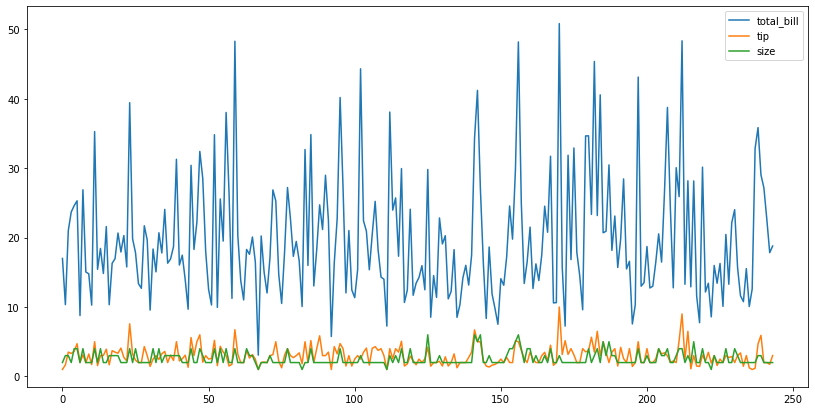

In [8]:
data.plot();

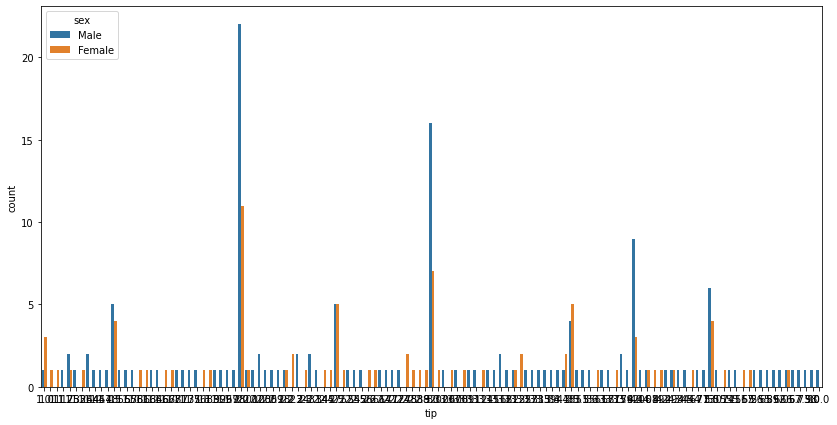

In [9]:
sns.countplot('tip' , hue = 'sex' , data = data);

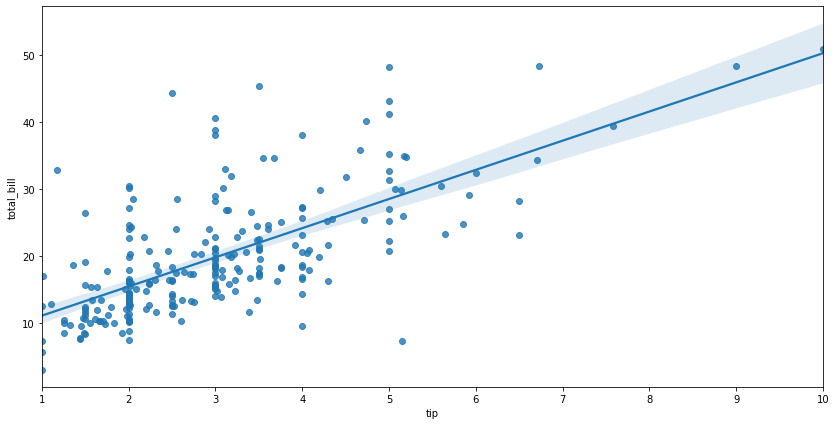

In [11]:
sns.regplot(x  = 'tip',  y  = 'total_bill' , data  = data);

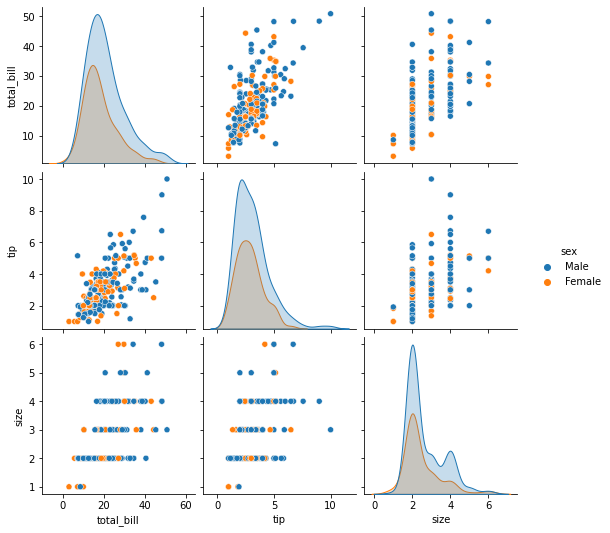

In [12]:
sns.pairplot(data = data , hue = 'sex');

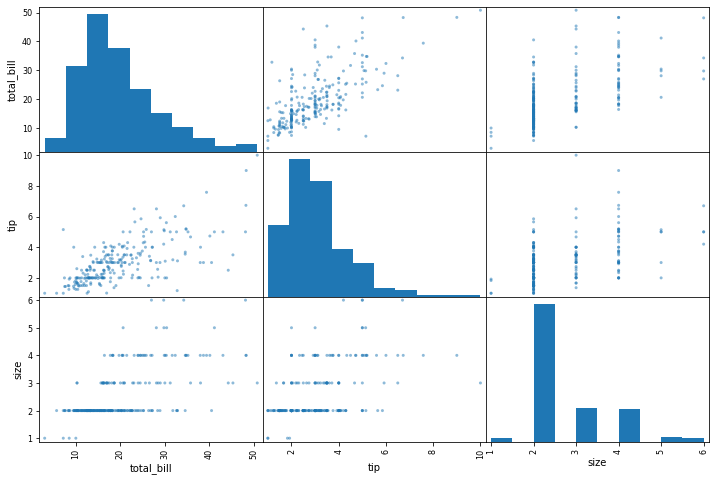

In [14]:
pd.plotting.scatter_matrix(data , diagonal='hist' , figsize =(12,8));

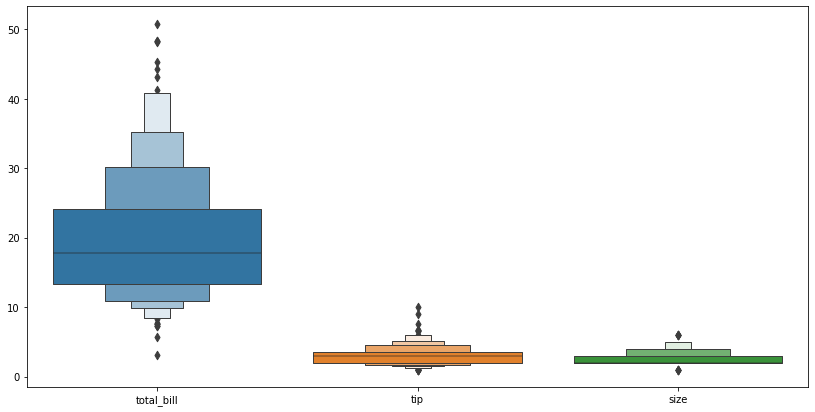

In [15]:
sns.boxenplot(data = data);

In [20]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


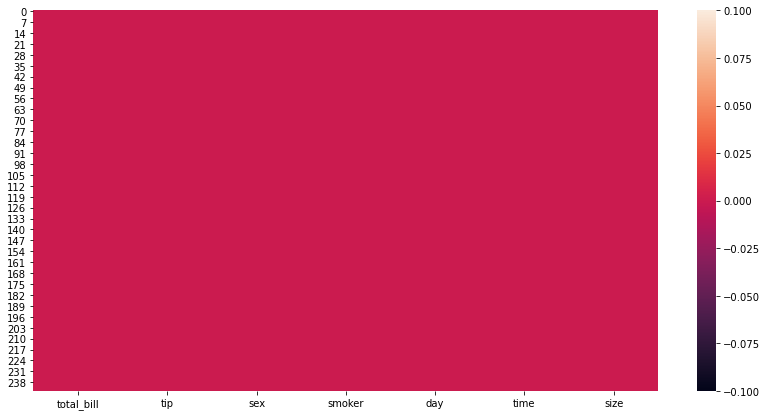

In [21]:
sns.heatmap(data.isnull());

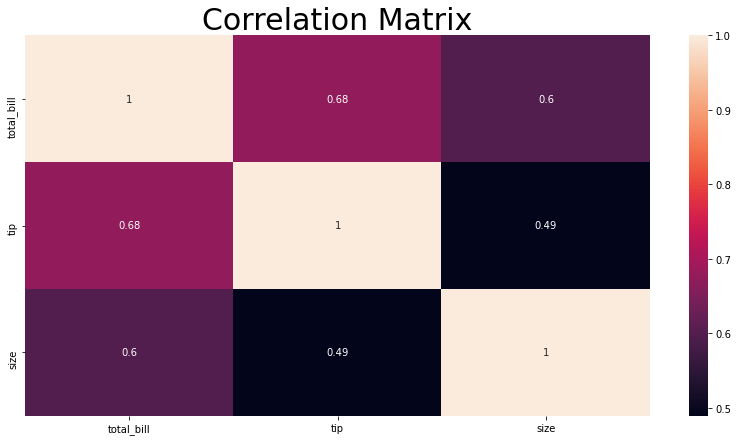

In [24]:
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Matrix', fontsize = 30)
plt.show()

In [25]:
data['sex'] = data['sex'].cat.codes

In [26]:
data['smoker'] = data['smoker'].cat.codes

In [27]:
data['day'] = data ['day'].cat.codes

In [28]:
data['time'] = data['time'].cat.codes

In [29]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,1,3,1,2
1,10.34,1.66,0,1,3,1,3
2,21.01,3.50,0,1,3,1,3
3,23.68,3.31,0,1,3,1,2
4,24.59,3.61,1,1,3,1,4


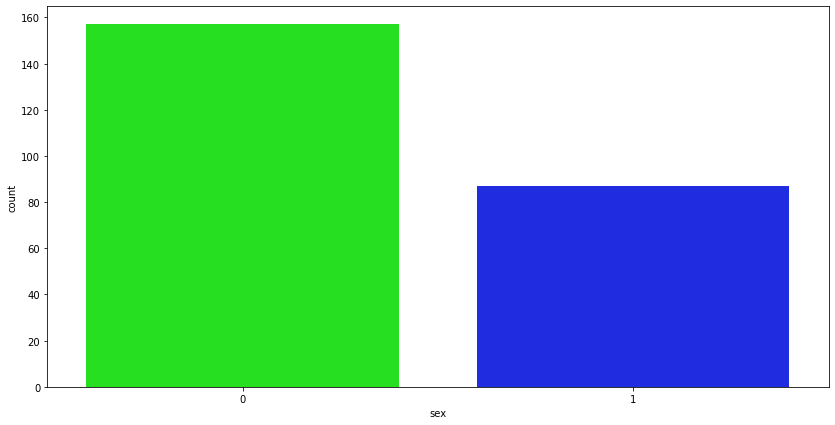

In [57]:
sns.countplot(data['sex'] , palette='hsv');

In [31]:
X = data.drop('tip' ,axis = 1)
y = data['tip']

In [34]:
y

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [35]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.25, random_state=1)

In [36]:
from sklearn.ensemble import RandomForestRegressor


In [37]:
rf_model = RandomForestRegressor(n_estimators=200 , max_features=None)

In [38]:
rf_model.fit(X_train ,y_train)

RandomForestRegressor(max_features=None, n_estimators=200)

In [39]:
rf_model_pred = rf_model.predict(X_test)

In [40]:
df = pd.DataFrame({'Actual_Tips':y_test , 'Predicted_Tips':rf_model_pred})

In [41]:
df.head()

,Actual_Tips,Predicted_Tips
67,1.00,1.54805
243,3.00,2.59005
206,3.41,3.58925
122,2.50,2.20125
89,3.00,3.19170


In [42]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(rf_model ,X_train , y_train).mean()*100)

33.003568506277546


In [50]:
def Custom_Accuracy(y_test , y_pred , threshold):
    result = 0
    m = len(y_pred)
    for i in range(m):
        if(abs(y_test[i] - y_pred[i]) <=threshold):
            result += 1 
        return (result *m / 100)
    
y_pred = rf_model.predict(X_test)
score = rf_model.score(X_test , y_test)
print('R-Squared=' , score*100,"%")
print('Custom Accuracy=',Custom_Accuracy(y_test ,y_pred ,20)*100,"%")
    

R-Squared= 53.156826607414985 %
Custom Accuracy= 61.0 %


---

In [51]:
from shapash.explainer.smart_explainer import SmartExplainer

In [52]:
xpl = SmartExplainer()

In [54]:
xpl.compile(x = X_test,
           model = rf_model)

Backend: Shap TreeExplainer


In [55]:
app = xpl.run_app(title_story='Tips DataSet')

INFO:root:Your Shapash application run on http://Dell-PC:8050/


Dash is running on http://0.0.0.0:8050/



INFO:shapash.webapp.smart_app:Dash is running on http://0.0.0.0:8050/

INFO:root:Use the method .kill() to down your app.


 * Serving Flask app "shapash.webapp.smart_app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://0.0.0.0:8050/ (Press CTRL+C to quit)
INFO:werkzeug:192.168.186.102 - - [19/Jul/2021 13:42:04] "GET / HTTP/1.1" 200 -
INFO:werkzeug:192.168.186.102 - - [19/Jul/2021 13:42:04] "GET /assets/material-icons.css?m=1617788595.3948953 HTTP/1.1" 304 -
INFO:werkzeug:192.168.186.102 - - [19/Jul/2021 13:42:04] "GET /assets/style.css?m=1617788595.4078963 HTTP/1.1" 304 -
INFO:werkzeug:192.168.186.102 - - [19/Jul/2021 13:42:04] "GET /assets/main.js?m=1617788595.3928952 HTTP/1.1" 304 -
INFO:werkzeug:192.168.186.102 - - [19/Jul/2021 13:42:04] "GET /assets/jquery.js?m=1617788595.3908951 HTTP/1.1" 304 -
INFO:werkzeug:192.168.186.102 - - [19/Jul/2021 13:42:05] "GET /_dash-dependencies HTTP/1.1" 200 -
INFO:werkzeug:192.168.186.102 - - [19/Jul/2021 13:42:05] "GET /_dash-layout HTTP/1.1" 200 -
INFO:werkzeug:192.168.186.102 - - [19/Jul/2021 13:42:05] "GET /assets/favicon.ico?m=1617788595.387895 HTTP/1.1" 304 -
INFO:werkzeug:192.168.186.102 - - [19/Jul/2021 13:42:05] "POST /_

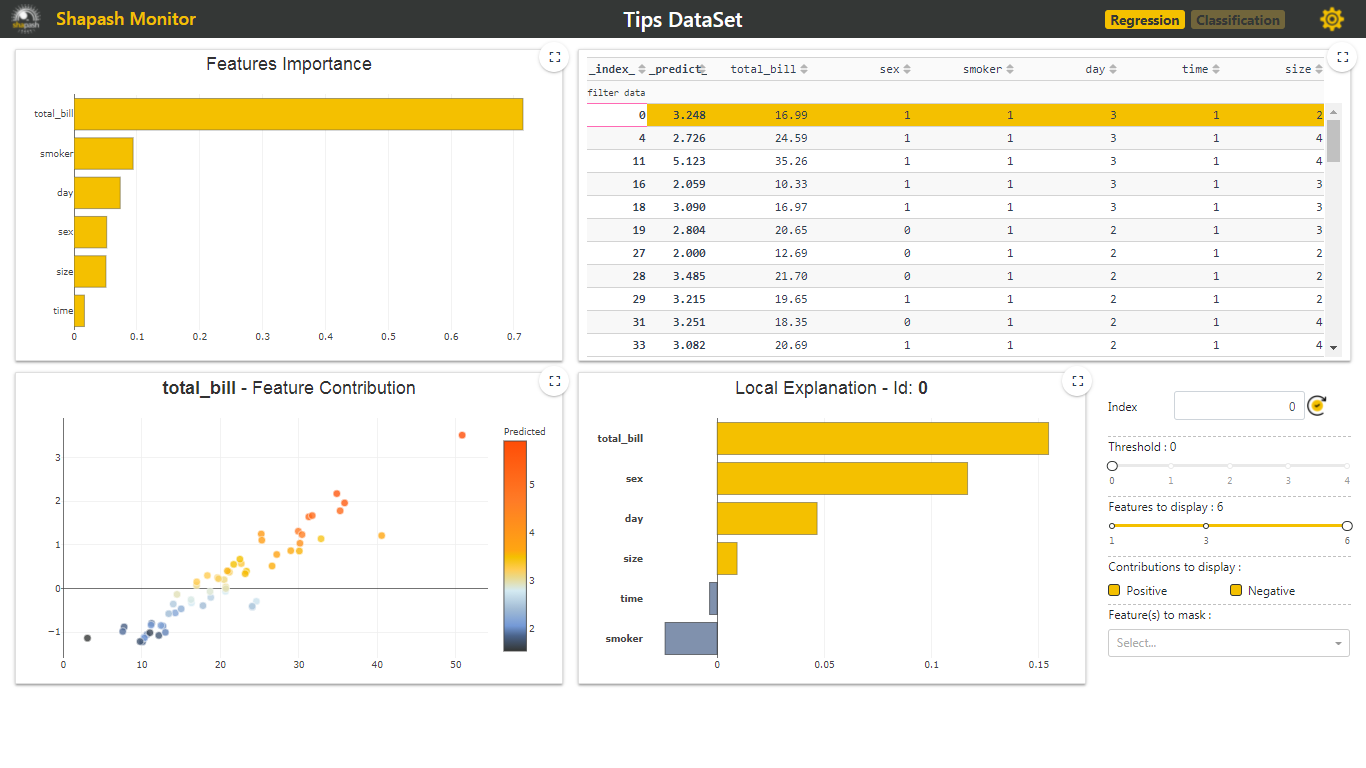

---

---

---